In [34]:
import pandas as pd
from sklearn.decomposition import PCA
import plotly.express as px
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import pandas as pd

In [17]:
data = pd.read_csv('clean_output.csv')
features = list(data.columns)
features.remove('0')

In [33]:
print(data.dtypes)

0       int64
1     float64
2     float64
3     float64
4     float64
5     float64
6     float64
7     float64
8     float64
9     float64
10    float64
11    float64
12    float64
13    float64
dtype: object


3.	Perform PCA on 3 different scaled data: (a) Meancentered; (b)Autoscaling; (c) Paretoscaling

In [19]:
feature_df = data[features]

In [20]:
def PCAplotting(df, classes):
    pca = PCA(n_components=3)
    components = pca.fit_transform(df)
    explained_variance_ratio = pca.explained_variance_ratio_

    fig = px.scatter(components, x=0, y=1, color=classes,
                     labels={'0': f'PC1 {explained_variance_ratio[0]*100:.2f}%', '1': f'PC2 {explained_variance_ratio[1]*100:.2f}%'})
    fig.show()

def mean_center(df):
    return df - df.mean()
    
def autoscale(df):
    return (df - df.mean()) / df.std()

def pareto_scale(df):
    return (df - df.mean()) / np.sqrt(df.std())

In [21]:
df_meancentered = mean_center(feature_df)
PCAplotting(df_meancentered, data['0'])

In [22]:
df_autoscaled = autoscale(feature_df)
PCAplotting(df_autoscaled, data['0'])

In [23]:
df_paretoscaled = pareto_scale(feature_df)
PCAplotting(df_paretoscaled, data['0'])

C:\Users\bradn\AppData\Local\Temp\ipykernel_20768\1995072112.py:35: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



Text(0, 0.5, 'PC2 4.90%')

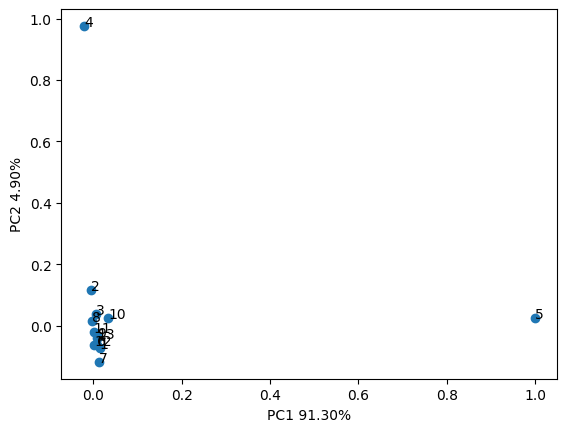

In [43]:

y = data.iloc[:, 0]   
x_scaled = mean_center(feature_df)
 
# Perform PCA on Scaled Data
pca = PCA(n_components=2)
 
 
pca_features = pca.fit_transform(x_scaled)
explained_variance_ratio = pca.explained_variance_ratio_
# Principal components correlation coefficients
loadings = pca.components_
 
# Number of features before PCA
n_features = pca.n_features_in_
 
# Feature names before PCA
feature = list(data.columns)
feature.remove('0')
 
# PC names
pc_list = [f'PC{i}' for i in list(range(1, n_features + 1))]
 
# Match PC names to loadings
pc_loadings = dict(zip(pc_list, loadings))
 
# Matrix of corr coefs between feature names and PCs
loadings_df = pd.DataFrame.from_dict(pc_loadings)
loadings_df['feature_names'] = feature
loadings_df = loadings_df.set_index('feature_names')
loadings_df


plt.scatter(loadings_df['PC1'],loadings_df['PC2'])
for i in range(len(feature)):
    plt.text(loadings_df['PC1'][i],loadings_df['PC2'][i],feature[i])
plt.xlabel(f'PC1 {explained_variance_ratio[0]*100:.2f}%')
plt.ylabel(f'PC2 {explained_variance_ratio[1]*100:.2f}%')

C:\Users\bradn\AppData\Local\Temp\ipykernel_20768\2134255616.py:36: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



Text(0, 0.5, 'PC2 19.33%')

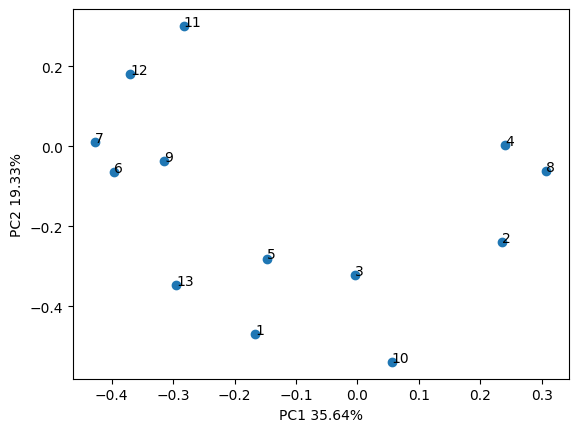

In [42]:
X = data.iloc[:, 1:] 
y = data.iloc[:, 0]   
x_scaled = StandardScaler().fit_transform(X)
 
# Perform PCA on Scaled Data
pca = PCA(n_components=2)
 
 
pca_features = pca.fit_transform(x_scaled)
explained_variance_ratio = pca.explained_variance_ratio_
# Principal components correlation coefficients
loadings = pca.components_
 
# Number of features before PCA
n_features = pca.n_features_in_
 
# Feature names before PCA
feature = list(data.columns)
feature.remove('0')
 
# PC names
pc_list = [f'PC{i}' for i in list(range(1, n_features + 1))]
 
# Match PC names to loadings
pc_loadings = dict(zip(pc_list, loadings))
 
# Matrix of corr coefs between feature names and PCs
loadings_df = pd.DataFrame.from_dict(pc_loadings)
loadings_df['feature_names'] = feature
loadings_df = loadings_df.set_index('feature_names')
loadings_df


plt.scatter(loadings_df['PC1'],loadings_df['PC2'])
for i in range(len(feature)):
    plt.text(loadings_df['PC1'][i],loadings_df['PC2'][i],feature[i])
plt.xlabel(f'PC1 {explained_variance_ratio[0]*100:.2f}%')
plt.ylabel(f'PC2 {explained_variance_ratio[1]*100:.2f}%')

C:\Users\bradn\AppData\Local\Temp\ipykernel_20768\3183363641.py:35: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



Text(0, 0.5, 'PC2 16.37%')

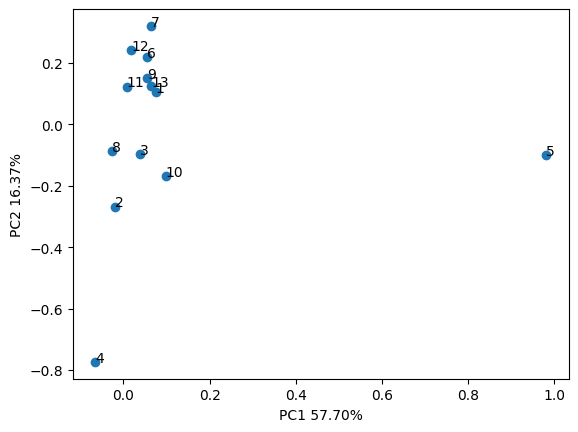

In [44]:

y = data.iloc[:, 0]   
x_scaled = pareto_scale(feature_df)
 
# Perform PCA on Scaled Data
pca = PCA(n_components=2)
 
 
pca_features = pca.fit_transform(x_scaled)
explained_variance_ratio = pca.explained_variance_ratio_
# Principal components correlation coefficients
loadings = pca.components_
 
# Number of features before PCA
n_features = pca.n_features_in_
 
# Feature names before PCA
feature = list(data.columns)
feature.remove('0')
 
# PC names
pc_list = [f'PC{i}' for i in list(range(1, n_features + 1))]
 
# Match PC names to loadings
pc_loadings = dict(zip(pc_list, loadings))
 
# Matrix of corr coefs between feature names and PCs
loadings_df = pd.DataFrame.from_dict(pc_loadings)
loadings_df['feature_names'] = feature
loadings_df = loadings_df.set_index('feature_names')
loadings_df


plt.scatter(loadings_df['PC1'],loadings_df['PC2'])
for i in range(len(feature)):
    plt.text(loadings_df['PC1'][i],loadings_df['PC2'][i],feature[i])
plt.xlabel(f'PC1 {explained_variance_ratio[0]*100:.2f}%')
plt.ylabel(f'PC2 {explained_variance_ratio[1]*100:.2f}%')